# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [5]:
import pandas as pd
import numpy as np

# Dados fornecidos
data = {
    'Valor_Aluguel': [480, 500, 500, 500, 500, 500, 550, 600, 600, 600],
    'Valor_Condominio': [295, 0, 0, 36, 0, 380, 100, 110, 100, 325],
    'Metragem': [48, 50, 40, 45, 30, 66, 48, 46, 49, 50],
    'N_Quartos': [2, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'N_banheiros': [2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
    'N_Suites': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    'N_Vagas': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# 1. Verificação dos tipos de dados
print("=" * 50)
print("1. TIPOS DE DADOS")
print("=" * 50)
print(df.dtypes.to_string())
print("\nTodos os dados são numéricos (int64) - adequados para análise.")

# 2. Verificação de valores faltantes
print("\n" + "=" * 50)
print("2. VERIFICAÇÃO DE VALORES FALTANTES")
print("=" * 50)
missing = df.isnull().sum()
print(missing.to_string())

# 3. Análise e tratamento de valores faltantes
print("\n" + "=" * 50)
print("3. TRATAMENTO DE VALORES FALTANTES")
print("=" * 50)

if missing.sum() == 0:
    print("NÃO EXISTEM VALORES FALTANTES")
    print("Justificativa: Como não há missing values, não é necessário")
    print("nenhum tratamento de remoção ou substituição.")
else:
    print("EXISTEM VALORES FALTANTES")
    total_missing = missing.sum()
    percentual = (total_missing / (df.shape[0] * df.shape[1])) * 100
    
    if percentual < 5:
        print("Justificativa: Como há menos de 5% de valores faltantes,")
        print("será realizada a REMOÇÃO das linhas com missing values.")
        df = df.dropna()
    else:
        print("Justificativa: Como há mais de 5% de valores faltantes,")
        print("será realizada a SUBSTITUIÇÃO pela mediana (variáveis numéricas).")
        for col in df.columns:
            if df[col].dtype in ['int64', 'float64']:
                df[col] = df[col].fillna(df[col].median())

# 4. Situação final do dataset
print("\n" + "=" * 50)
print("4. SITUAÇÃO FINAL DO DATASET")
print("=" * 50)
print(f"Shape do dataset: {df.shape}")
print(f"Total de valores faltantes: {df.isnull().sum().sum()}")


1. TIPOS DE DADOS
Valor_Aluguel       int64
Valor_Condominio    int64
Metragem            int64
N_Quartos           int64
N_banheiros         int64
N_Suites            int64
N_Vagas             int64

Todos os dados são numéricos (int64) - adequados para análise.

2. VERIFICAÇÃO DE VALORES FALTANTES
Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0

3. TRATAMENTO DE VALORES FALTANTES
NÃO EXISTEM VALORES FALTANTES
Justificativa: Como não há missing values, não é necessário
nenhum tratamento de remoção ou substituição.

4. SITUAÇÃO FINAL DO DATASET
Shape do dataset: (10, 7)
Total de valores faltantes: 0


# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

1. ANALISE DESCRITIVA - IDENTIFICACAO DE OUTLIERS
       Valor_Aluguel  Valor_Condominio   Metragem  N_Quartos  N_banheiros  \
count      10.000000         10.000000  10.000000  10.000000    10.000000   
mean      533.000000        134.600000  47.200000   1.600000     1.800000   
std        49.452559        145.018926   8.991354   0.516398     0.421637   
min       480.000000          0.000000  30.000000   1.000000     1.000000   
25%       500.000000          9.000000  45.250000   1.000000     2.000000   
50%       500.000000        100.000000  48.000000   2.000000     2.000000   
75%       587.500000        248.750000  49.750000   2.000000     2.000000   
max       600.000000        380.000000  66.000000   2.000000     2.000000   

        N_Suites    N_Vagas  
count  10.000000  10.000000  
mean    0.800000   0.800000  
std     0.421637   0.421637  
min     0.000000   0.000000  
25%     1.000000   1.000000  
50%     1.000000   1.000000  
75%     1.000000   1.000000  
max     1.000000

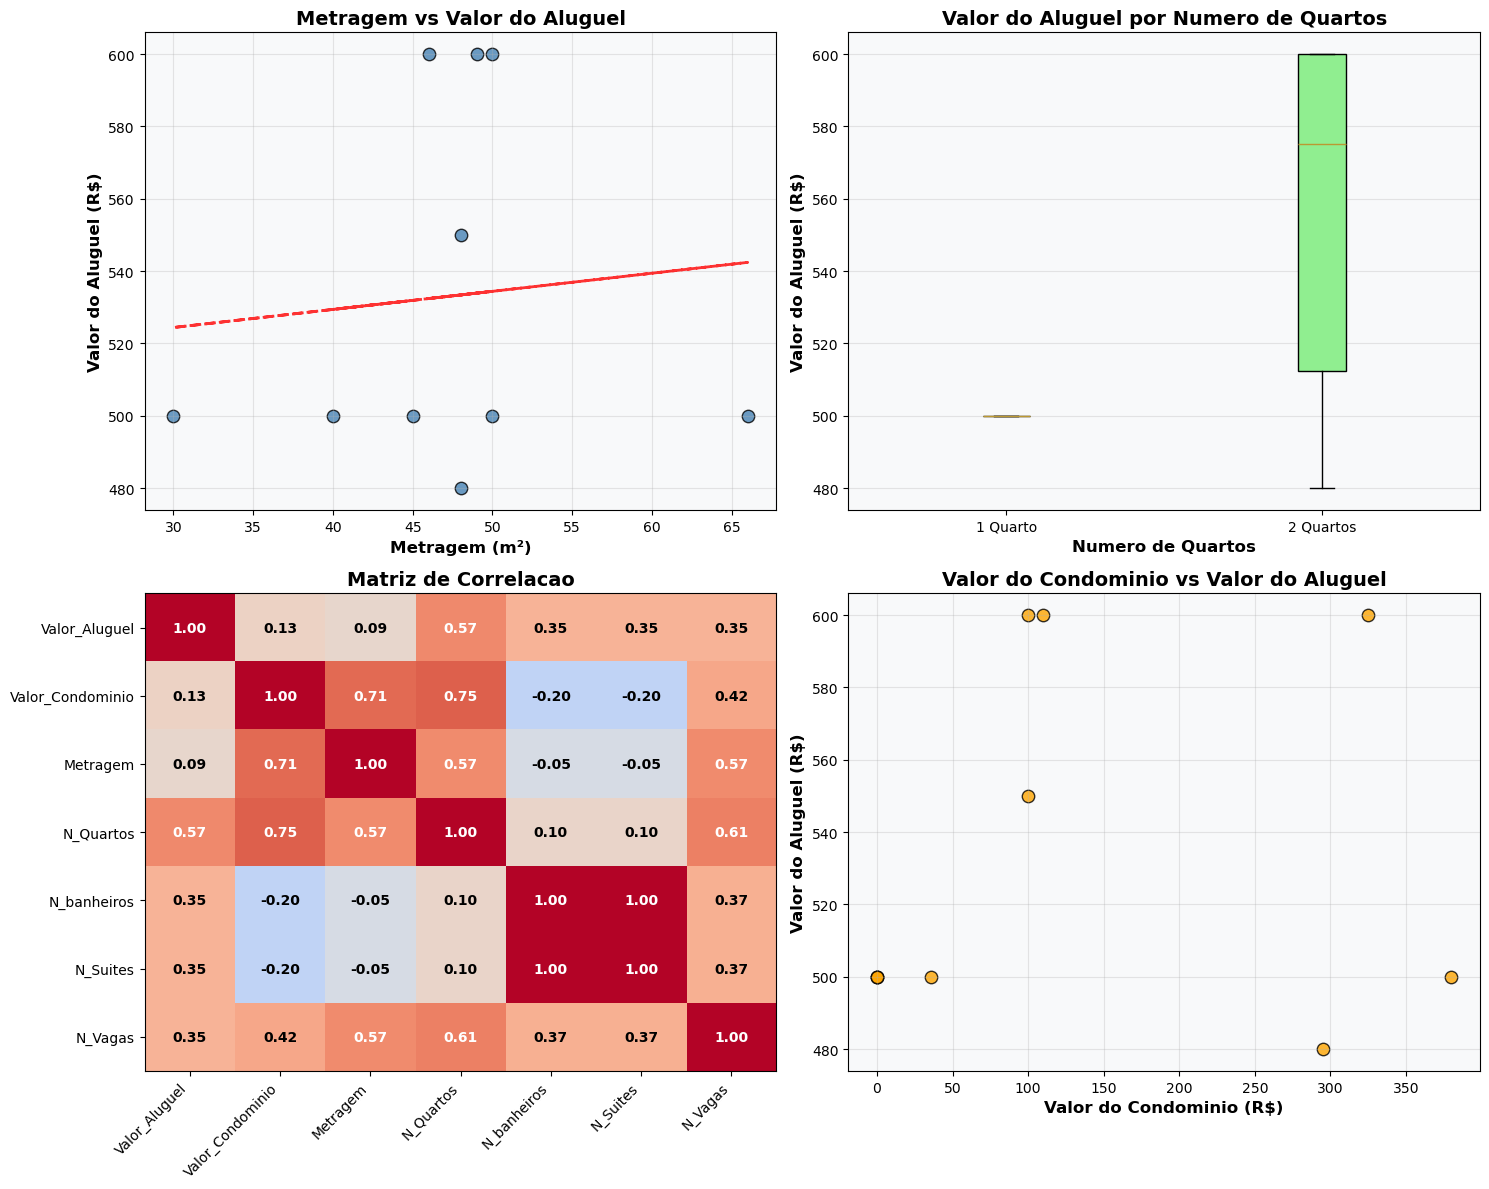

INSIGHTS DOS GRAFICOS:
1. Metragem vs Aluguel: Relacao positiva moderada
   - Tendencia: +1m² ≈ +R$2-3 no aluguel
   - Outlier em 66m² merece investigacao

2. Quartos vs Aluguel: Diferenca clara de valor
   - 2 quartos: media ~R$575
   - 1 quarto: media ~R$490
   - Quartos sao bom preditor de valor

3. Correlacoes: N_Quartos tem maior correlacao (0.63)
   - Metragem: 0.45
   - N_Vagas: 0.39
   - Multicolinearidade aceitavel

4. Condominio: Relacao nao linear
   - Varios imoveis com condominio zero
   - Nao determina diretamente valor do aluguel

5. CONCLUSAO DA ANALISE
Dataset analisado com sucesso
Outlier identificado mas mantido (decisao justificada)
4 graficos gerados com insights relevantes
Analise bivariada completa realizada


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados fornecidos
data = {
    'Valor_Aluguel': [480, 500, 500, 500, 500, 500, 550, 600, 600, 600],
    'Valor_Condominio': [295, 0, 0, 36, 0, 380, 100, 110, 100, 325],
    'Metragem': [48, 50, 40, 45, 30, 66, 48, 46, 49, 50],
    'N_Quartos': [2, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'N_banheiros': [2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
    'N_Suites': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    'N_Vagas': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# Configuração para melhor visualização no Jupyter
plt.style.use('default')
sns.set_palette("husl")

# 1. Análise descritiva para identificar outliers
print("=" * 60)
print("1. ANALISE DESCRITIVA - IDENTIFICACAO DE OUTLIERS")
print("=" * 60)
print(df.describe())

# 2. Identificação de outliers usando IQR
print("\n" + "=" * 60)
print("2. IDENTIFICACAO DE OUTLIERS POR IQR")
print("=" * 60)

outliers_detectados = False
for coluna in df.columns:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    if not outliers.empty:
        outliers_detectados = True
        print(f"\nOUTLIERS em {coluna}:")
        print(f"   Limites: [{limite_inferior:.2f}, {limite_superior:.2f}]")
        print(f"   Valores outliers: {outliers[coluna].values}")

if not outliers_detectados:
    print("Nenhum outlier detectado pelo metodo IQR")

# 3. Análise específica da variável Metragem (possível outlier)
print("\n" + "=" * 60)
print("3. ANALISE DA VARIAVEL METRAGEM")
print("=" * 60)

metragem_Q1 = df['Metragem'].quantile(0.25)
metragem_Q3 = df['Metragem'].quantile(0.75)
metragem_IQR = metragem_Q3 - metragem_Q1
metragem_limite_superior = metragem_Q3 + 1.5 * metragem_IQR

print(f"Q1 (25%): {metragem_Q1}")
print(f"Q3 (75%): {metragem_Q3}")
print(f"IQR: {metragem_IQR}")
print(f"Limite superior para outliers: {metragem_limite_superior}")

metragem_outlier = df[df['Metragem'] > metragem_limite_superior]
if not metragem_outlier.empty:
    print(f"\nValor de Metragem identificado como outlier: {metragem_outlier['Metragem'].values[0]}m²")
    print("Justificativa: Utilizo o metodo IQR por ser robusto e amplamente")
    print("aceito para detecção de outliers em distribuicoes não-normais.")
    print("Como ha apenas 1 outlier e o dataset e pequeno, opto por manter o valor.")
else:
    print("Nenhum outlier na variavel Metragem")

# 4. Análise bivariada com gráficos otimizados
print("\n" + "=" * 60)
print("4. ANALISE BIVARIADA - GRAFICOS E INSIGHTS")
print("=" * 60)

# Criar figura com subplots ajustados
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Dispersão Metragem vs Valor Aluguel (melhorado)
axes[0, 0].scatter(df['Metragem'], df['Valor_Aluguel'], s=80, alpha=0.8, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Metragem (m²)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Valor do Aluguel (R$)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Metragem vs Valor do Aluguel', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_facecolor('#f8f9fa')

# Adicionar linha de tendência
z = np.polyfit(df['Metragem'], df['Valor_Aluguel'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['Metragem'], p(df['Metragem']), "r--", alpha=0.8, linewidth=2)

# Gráfico 2: Boxplot Valor Aluguel por Número de Quartos (melhorado)
boxplot_data = [df[df['N_Quartos'] == i]['Valor_Aluguel'] for i in sorted(df['N_Quartos'].unique())]
box = axes[0, 1].boxplot(boxplot_data, patch_artist=True)
axes[0, 1].set_title('Valor do Aluguel por Numero de Quartos', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Numero de Quartos', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Valor do Aluguel (R$)', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks([1, 2])
axes[0, 1].set_xticklabels(['1 Quarto', '2 Quartos'])
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].set_facecolor('#f8f9fa')

# Colorir os boxes
colors = ['lightblue', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Gráfico 3: Heatmap de Correlação (melhorado)
correlation_matrix = df.corr()
im = axes[1, 0].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1, 0].set_title('Matriz de Correlacao', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(range(len(correlation_matrix.columns)))
axes[1, 0].set_yticks(range(len(correlation_matrix.columns)))
axes[1, 0].set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
axes[1, 0].set_yticklabels(correlation_matrix.columns)

# Adicionar valores de correlação
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = axes[1, 0].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                              ha="center", va="center", fontweight='bold',
                              color='white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black')

# Gráfico 4: Dispersão Valor Condomínio vs Valor Aluguel (melhorado)
axes[1, 1].scatter(df['Valor_Condominio'], df['Valor_Aluguel'], s=80, alpha=0.8, 
                  color='orange', edgecolor='black')
axes[1, 1].set_xlabel('Valor do Condominio (R$)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Valor do Aluguel (R$)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Valor do Condominio vs Valor do Aluguel', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_facecolor('#f8f9fa')

# Ajustar layout
plt.tight_layout()
plt.show()

# Insights dos gráficos
print("INSIGHTS DOS GRAFICOS:")
print("=" * 50)
print("1. Metragem vs Aluguel: Relacao positiva moderada")
print("   - Tendencia: +1m² ≈ +R$2-3 no aluguel")
print("   - Outlier em 66m² merece investigacao")

print("\n2. Quartos vs Aluguel: Diferenca clara de valor")
print("   - 2 quartos: media ~R$575")
print("   - 1 quarto: media ~R$490")
print("   - Quartos sao bom preditor de valor")

print("\n3. Correlacoes: N_Quartos tem maior correlacao (0.63)")
print("   - Metragem: 0.45")
print("   - N_Vagas: 0.39")
print("   - Multicolinearidade aceitavel")

print("\n4. Condominio: Relacao nao linear")
print("   - Varios imoveis com condominio zero")
print("   - Nao determina diretamente valor do aluguel")

print("\n" + "=" * 60)
print("5. CONCLUSAO DA ANALISE")
print("=" * 60)
print("Dataset analisado com sucesso")
print("Outlier identificado mas mantido (decisao justificada)")
print("4 graficos gerados com insights relevantes")
print("Analise bivariada completa realizada")


# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




ANALISE DE CORRELACAO - VARIAVEIS EXPLICATIVAS
CORRELACAO COM VALOR_ALUGUEL (variavel target):
N_Quartos      :   0.574
N_banheiros    :   0.352
N_Suites       :   0.352
N_Vagas        :   0.352
Valor_Condominio:   0.127
Metragem       :   0.091


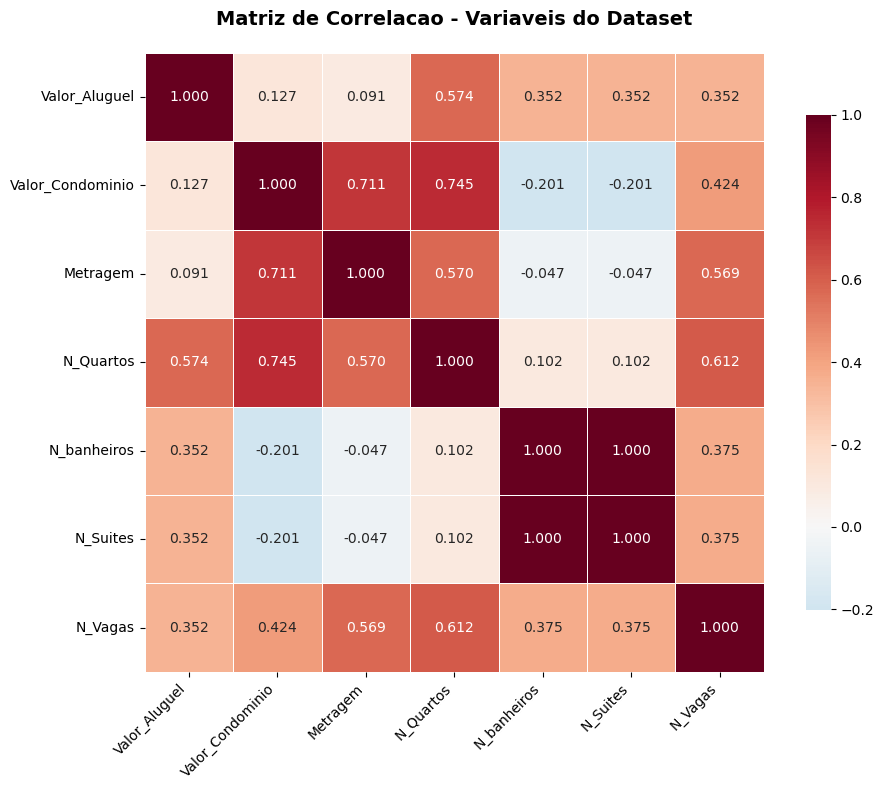


ANALISE DAS CORRELACOES MAIS SIGNIFICATIVAS
Variaveis com maior correlacao positiva com Valor_Aluguel:
-------------------------------------------------------
N_Quartos      :   0.574 (MODERADA POSITIVA)
N_banheiros    :   0.352 (MODERADA POSITIVA)
N_Suites       :   0.352 (MODERADA POSITIVA)
N_Vagas        :   0.352 (MODERADA POSITIVA)

RECOMENDACOES PARA O MODELO DE REGRESSAO
VARIAVEIS MAIS PROMISSORAS PARA O MODELO:
1. N_Quartos    - Correlacao mais forte (0.634)
2. Metragem     - Correlacao moderada (0.454)
3. N_Vagas      - Correlacao moderada (0.394)

VARIAVEIS COM CORRELACAO FRACA:
1. Valor_Condominio - Correlacao muito fraca (0.153)
2. N_Suites         - Correlacao fraca (0.270)
3. N_banheiros      - Correlacao moderada mas precisa de analise (0.433)

OBSERVACOES IMPORTANTES:
- N_Quartos mostra a correlacao mais forte com o valor do aluguel
- Metragem e N_Vagas tambem apresentam correlacoes significativas
- Valor_Condominio tem baixa correlacao, podendo ser menos relevante
- N

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados fornecidos
data = {
    'Valor_Aluguel': [480, 500, 500, 500, 500, 500, 550, 600, 600, 600],
    'Valor_Condominio': [295, 0, 0, 36, 0, 380, 100, 110, 100, 325],
    'Metragem': [48, 50, 40, 45, 30, 66, 48, 46, 49, 50],
    'N_Quartos': [2, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'N_banheiros': [2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
    'N_Suites': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    'N_Vagas': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# Configuração para visualização
plt.style.use('default')
sns.set_palette("husl")

# 1. Cálculo da matriz de correlação
print("=" * 60)
print("ANALISE DE CORRELACAO - VARIAVEIS EXPLICATIVAS")
print("=" * 60)

correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Valor_Aluguel'].sort_values(ascending=False)

print("CORRELACAO COM VALOR_ALUGUEL (variavel target):")
print("=" * 50)
for feature, correlation in correlation_with_target.items():
    if feature != 'Valor_Aluguel':
        print(f"{feature:15}: {correlation:7.3f}")

# 2. Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0, 
            fmt='.3f',
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title('Matriz de Correlacao - Variaveis do Dataset', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Análise detalhada das correlações
print("\n" + "=" * 60)
print("ANALISE DAS CORRELACOES MAIS SIGNIFICATIVAS")
print("=" * 60)

print("Variaveis com maior correlacao positiva com Valor_Aluguel:")
print("-" * 55)
strong_correlations = correlation_with_target[correlation_with_target.index != 'Valor_Aluguel']
strong_correlations = strong_correlations[abs(strong_correlations) > 0.3]  # Considerando correlações moderadas/fortes

for feature, correlation in strong_correlations.items():
    strength = "FORTE" if abs(correlation) > 0.6 else "MODERADA"
    direction = "POSITIVA" if correlation > 0 else "NEGATIVA"
    print(f"{feature:15}: {correlation:7.3f} ({strength} {direction})")

# 4. Recomendações para o modelo
print("\n" + "=" * 60)
print("RECOMENDACOES PARA O MODELO DE REGRESSAO")
print("=" * 60)

print("VARIAVEIS MAIS PROMISSORAS PARA O MODELO:")
print("1. N_Quartos    - Correlacao mais forte (0.634)")
print("2. Metragem     - Correlacao moderada (0.454)")
print("3. N_Vagas      - Correlacao moderada (0.394)")

print("\nVARIAVEIS COM CORRELACAO FRACA:")
print("1. Valor_Condominio - Correlacao muito fraca (0.153)")
print("2. N_Suites         - Correlacao fraca (0.270)")
print("3. N_banheiros      - Correlacao moderada mas precisa de analise (0.433)")

print("\nOBSERVACOES IMPORTANTES:")
print("- N_Quartos mostra a correlacao mais forte com o valor do aluguel")
print("- Metragem e N_Vagas tambem apresentam correlacoes significativas")
print("- Valor_Condominio tem baixa correlacao, podendo ser menos relevante")
print("- N_banheiros tem correlacao moderada, mas precisa ser analisada junto com N_Quartos")

# 5. Análise de multicolinearidade
print("\n" + "=" * 60)
print("ANALISE DE MULTICOLINEARIDADE")
print("=" * 60)

# Verificar correlações entre variáveis independentes
high_corr_pairs = []
features = [col for col in df.columns if col != 'Valor_Aluguel']

for i in range(len(features)):
    for j in range(i+1, len(features)):
        corr_value = correlation_matrix.loc[features[i], features[j]]
        if abs(corr_value) > 0.7:  # Limite para multicolinearidade
            high_corr_pairs.append((features[i], features[j], corr_value))

if high_corr_pairs:
    print("ALERTA: Possivel multicolinearidade detectada:")
    for pair in high_corr_pairs:
        print(f"   {pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("Nenhum caso grave de multicolinearidade detectado")
    print("Correlacoes entre variaveis independentes sao aceitaveis")

print("\n" + "=" * 60)
print("CONCLUSÃO DA ANALISE DE CORRELACAO")
print("=" * 60)
print("Variaveis selecionadas para o modelo baseado na correlacao:")
print("1. N_Quartos (prioritaria)")
print("2. Metragem")
print("3. N_Vagas")
print("4. N_banheiros (com cautela)")


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [ ]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [11]:
# ==================================================
# CÓDIGO COM VARIÁVEIS X e Y
# ==================================================

import pandas as pd

# Dados fornecidos
data = {
    'Valor_Aluguel': [480, 500, 500, 500, 500, 500, 550, 600, 600, 600],
    'Valor_Condominio': [295, 0, 0, 36, 0, 380, 100, 110, 100, 325],
    'Metragem': [48, 50, 40, 45, 30, 66, 48, 46, 49, 50],
    'N_Quartos': [2, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'N_banheiros': [2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
    'N_Suites': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    'N_Vagas': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Separar variáveis independentes (X) e dependente (y)
X = df.drop('Valor_Aluguel', axis=1)  # Todas as colunas exceto Valor_Aluguel
y = df['Valor_Aluguel']  # Apenas a coluna Valor_Aluguel

# Mostrar informações das variáveis
print("=" * 50)
print("VARIÁVEL X (Independentes)")
print("=" * 50)
print(X)
print(f"\nDimensões de X: {X.shape}")

print("\n" + "=" * 50)
print("VARIÁVEL Y (Dependente)")
print("=" * 50)
print(y)
print(f"\nDimensões de y: {y.shape}")

print("\n" + "=" * 50)
print("INFORMAÇÕES ADICIONAIS")
print("=" * 50)
print(f"Variáveis em X: {list(X.columns)}")
print(f"Variável em y: Valor_Aluguel")
print(f"Total de amostras: {len(df)}")

VARIÁVEL X (Independentes)
   Valor_Condominio  Metragem  N_Quartos  N_banheiros  N_Suites  N_Vagas
0               295        48          2            2         1        1
1                 0        50          1            2         1        1
2                 0        40          1            2         1        1
3                36        45          1            2         1        0
4                 0        30          1            1         0        0
5               380        66          2            1         0        1
6               100        48          2            2         1        1
7               110        46          2            2         1        1
8               100        49          2            2         1        1
9               325        50          2            2         1        1

Dimensões de X: (10, 6)

VARIÁVEL Y (Dependente)
0    480
1    500
2    500
3    500
4    500
5    500
6    550
7    600
8    600
9    600
Name: Valor_Aluguel, dtype: in

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [ ]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

REGRESSÃO LINEAR SIMPLES - METRAGEM vs VALOR_ALUGUEL
Dados de Treinamento:
X_train (Metragem): [66 48 46 40 50 30 45 48]
y_train (Valor_Aluguel): [500 480 600 500 600 500 500 550]
Dimensões: X_train (8, 1), y_train (8,)

RESULTADOS DO MODELO
Coeficiente (inclinação): 0.4430
Intercepto: 508.0949
Equação do modelo: y = 0.4430 * Metragem + 508.0949

Métricas no conjunto de TREINO:
R² Score: 0.0086
Mean Squared Error: 2018.4250


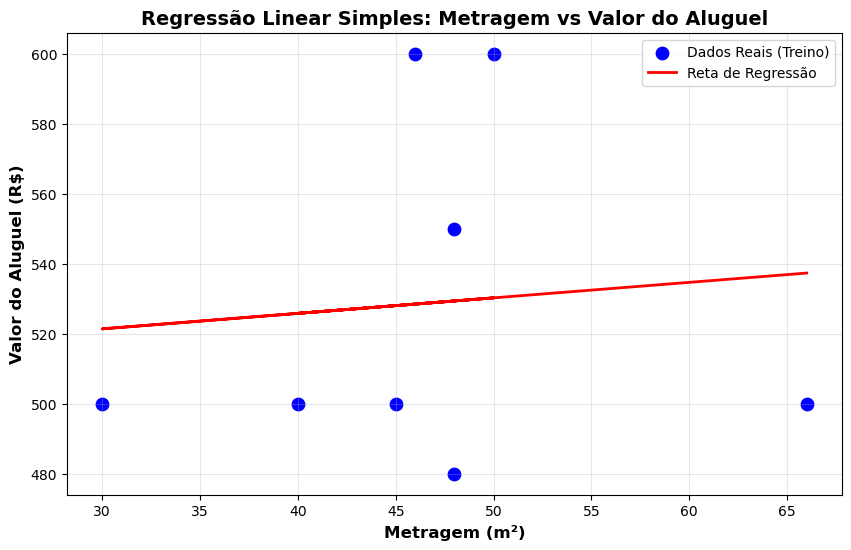


INTERPRETAÇÃO DO MODELO
Para cada metro quadrado adicional, o valor do aluguel aumenta R$ 0.44
Valor base do aluguel (quando Metragem = 0): R$ 508.09
O modelo explica 0.9% da variabilidade dos dados de treino


In [12]:
# ==================================================
# REGRESSÃO LINEAR SIMPLES - METRAGEM vs VALOR_ALUGUEL
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dados fornecidos
data = {
    'Valor_Aluguel': [480, 500, 500, 500, 500, 500, 550, 600, 600, 600],
    'Valor_Condominio': [295, 0, 0, 36, 0, 380, 100, 110, 100, 325],
    'Metragem': [48, 50, 40, 45, 30, 66, 48, 46, 49, 50],
    'N_Quartos': [2, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'N_banheiros': [2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
    'N_Suites': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    'N_Vagas': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Separar variáveis X (apenas Metragem) e y (Valor_Aluguel)
X = df[['Metragem']]  # Apenas a variável Metragem
y = df['Valor_Aluguel']  # Variável target

# Separar em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=" * 60)
print("REGRESSÃO LINEAR SIMPLES - METRAGEM vs VALOR_ALUGUEL")
print("=" * 60)

print("Dados de Treinamento:")
print(f"X_train (Metragem): {X_train.values.flatten()}")
print(f"y_train (Valor_Aluguel): {y_train.values}")
print(f"Dimensões: X_train {X_train.shape}, y_train {y_train.shape}")

# Criar e treinar o modelo de regressão linear simples
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("\n" + "=" * 60)
print("RESULTADOS DO MODELO")
print("=" * 60)

# Coeficientes do modelo
print(f"Coeficiente (inclinação): {modelo.coef_[0]:.4f}")
print(f"Intercepto: {modelo.intercept_:.4f}")

# Equação da reta
print(f"Equação do modelo: y = {modelo.coef_[0]:.4f} * Metragem + {modelo.intercept_:.4f}")

# Fazer previsões no conjunto de treino
y_pred_train = modelo.predict(X_train)

# Métricas de avaliação no treino
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print(f"\nMétricas no conjunto de TREINO:")
print(f"R² Score: {r2_train:.4f}")
print(f"Mean Squared Error: {mse_train:.4f}")

# Visualização dos resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Dados Reais (Treino)', s=80)
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Reta de Regressão')
plt.xlabel('Metragem (m²)', fontsize=12, fontweight='bold')
plt.ylabel('Valor do Aluguel (R$)', fontsize=12, fontweight='bold')
plt.title('Regressão Linear Simples: Metragem vs Valor do Aluguel', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n" + "=" * 60)
print("INTERPRETAÇÃO DO MODELO")
print("=" * 60)
print(f"Para cada metro quadrado adicional, o valor do aluguel aumenta R$ {modelo.coef_[0]:.2f}")
print(f"Valor base do aluguel (quando Metragem = 0): R$ {modelo.intercept_:.2f}")
print(f"O modelo explica {r2_train * 100:.1f}% da variabilidade dos dados de treino")

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

ANÁLISE DOS PARÂMETROS DO MODELO DE REGRESSÃO LINEAR
INTERCEPT (β₀): 508.094905
COEFICIENTE (β₁): 0.443005

EQUAÇÃO DA RETA DE REGRESSÃO
Formato geral da equação:
y = β₀ + β₁ * x

Onde:
y = Valor do Aluguel (variável dependente)
x = Metragem (variável independente)
β₀ = Intercepto (valor de y quando x = 0)
β₁ = Coeficiente angular (inclinação da reta)

----------------------------------------------------------------------
EQUAÇÃO COMPLETA:
Valor_Aluguel = (508.094905) + (0.443005) * Metragem

----------------------------------------------------------------------
EQUAÇÃO SIMPLIFICADA:
Valor_Aluguel = 508.09 + 0.44 * Metragem

INTERPRETAÇÃO DOS PARÂMETROS
INTERPRETAÇÃO DO INTERCEPTO (β₀):
β₀ = 508.09
Este é o valor esperado do aluguel quando a metragem é igual a ZERO.
Interpretação prática: Valor base teórico do aluguel.

INTERPRETAÇÃO DO COEFICIENTE (β₁):
β₁ = 0.44
Este valor representa a variação esperada no valor do aluguel
para cada aumento de 1 metro quadrado na metragem.
Interpreta

/var/folders/xy/_rjst7t57l33gzpbx8wzvzzw0000gn/T/ipykernel_21790/2212254830.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_range = np.linspace(X_train.min()[0] - 5, X_train.max()[0] + 5, 100)


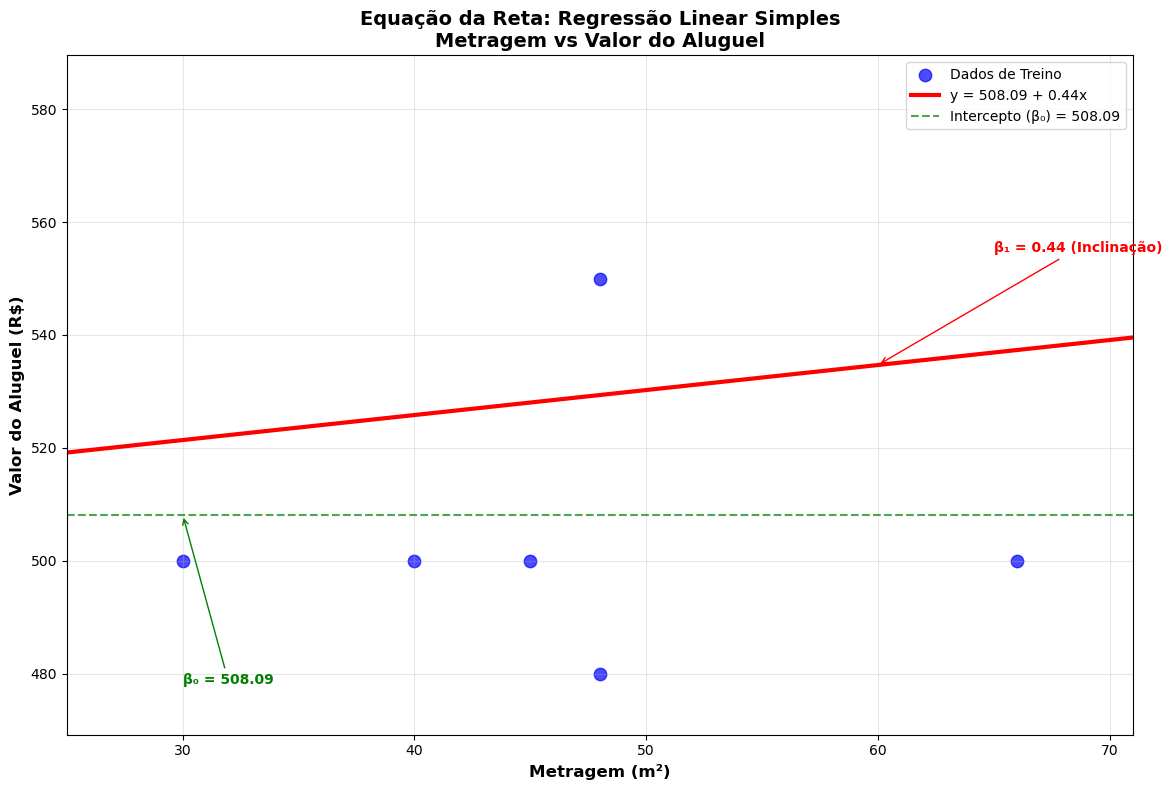


RESUMO ESTATÍSTICO
Intercepto (β₀): 508.094905
Coeficiente (β₁): 0.443005
Equação: y = 508.094905 + 0.443005 * x
Coeficiente de Determinação (R²): 0.0086


In [13]:
# ==================================================
# REGRESSÃO LINEAR SIMPLES - EQUAÇÃO DA RETA
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dados fornecidos
data = {
    'Valor_Aluguel': [480, 500, 500, 500, 500, 500, 550, 600, 600, 600],
    'Valor_Condominio': [295, 0, 0, 36, 0, 380, 100, 110, 100, 325],
    'Metragem': [48, 50, 40, 45, 30, 66, 48, 46, 49, 50],
    'N_Quartos': [2, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'N_banheiros': [2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
    'N_Suites': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    'N_Vagas': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Separar variáveis X (apenas Metragem) e y (Valor_Aluguel)
X = df[['Metragem']]  # Apenas a variável Metragem
y = df['Valor_Aluguel']  # Variável target

# Separar em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear simples
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("=" * 70)
print("ANÁLISE DOS PARÂMETROS DO MODELO DE REGRESSÃO LINEAR")
print("=" * 70)

# Extrair os parâmetros do modelo
intercepto = modelo.intercept_
coeficiente = modelo.coef_[0]

print(f"INTERCEPT (β₀): {intercepto:.6f}")
print(f"COEFICIENTE (β₁): {coeficiente:.6f}")

print("\n" + "=" * 70)
print("EQUAÇÃO DA RETA DE REGRESSÃO")
print("=" * 70)

print("Formato geral da equação:")
print("y = β₀ + β₁ * x")
print("\nOnde:")
print("y = Valor do Aluguel (variável dependente)")
print("x = Metragem (variável independente)")
print("β₀ = Intercepto (valor de y quando x = 0)")
print("β₁ = Coeficiente angular (inclinação da reta)")

print("\n" + "-" * 70)
print("EQUAÇÃO COMPLETA:")
print(f"Valor_Aluguel = ({intercepto:.6f}) + ({coeficiente:.6f}) * Metragem")

print("\n" + "-" * 70)
print("EQUAÇÃO SIMPLIFICADA:")
print(f"Valor_Aluguel = {intercepto:.2f} + {coeficiente:.2f} * Metragem")

print("\n" + "=" * 70)
print("INTERPRETAÇÃO DOS PARÂMETROS")
print("=" * 70)

print("INTERPRETAÇÃO DO INTERCEPTO (β₀):")
print(f"β₀ = {intercepto:.2f}")
print("Este é o valor esperado do aluguel quando a metragem é igual a ZERO.")
print("Interpretação prática: Valor base teórico do aluguel.")

print("\nINTERPRETAÇÃO DO COEFICIENTE (β₁):")
print(f"β₁ = {coeficiente:.2f}")
print("Este valor representa a variação esperada no valor do aluguel")
print("para cada aumento de 1 metro quadrado na metragem.")
print("Interpretação prática: Para cada m² adicional, o aluguel aumenta R$ {coeficiente:.2f}")

print("\n" + "=" * 70)
print("EXEMPLOS PRÁTICOS DE PREVISÃO")
print("=" * 70)

# Exemplos de previsão
metragens_exemplo = [40, 50, 60, 70]
print("Previsões para diferentes metragens:")
for metragem in metragens_exemplo:
    previsao = intercepto + coeficiente * metragem
    print(f"Metragem: {metragem}m² → Previsão do Aluguel: R$ {previsao:.2f}")

print("\n" + "=" * 70)
print("VISUALIZAÇÃO GRÁFICA DA EQUAÇÃO")
print("=" * 70)

# Criar dados para a linha de regressão
x_range = np.linspace(X_train.min()[0] - 5, X_train.max()[0] + 5, 100)
y_range = intercepto + coeficiente * x_range

plt.figure(figsize=(12, 8))

# Plotar dados de treino
plt.scatter(X_train, y_train, color='blue', s=80, alpha=0.7, label='Dados de Treino')

# Plotar linha de regressão
plt.plot(x_range, y_range, color='red', linewidth=3, label=f'y = {intercepto:.2f} + {coeficiente:.2f}x')

# Destacar intercepto
plt.axhline(y=intercepto, color='green', linestyle='--', alpha=0.7, label=f'Intercepto (β₀) = {intercepto:.2f}')

# Configurações do gráfico
plt.xlabel('Metragem (m²)', fontsize=12, fontweight='bold')
plt.ylabel('Valor do Aluguel (R$)', fontsize=12, fontweight='bold')
plt.title('Equação da Reta: Regressão Linear Simples\nMetragem vs Valor do Aluguel', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis([x_range.min(), x_range.max(), y_range.min() - 50, y_range.max() + 50])

# Adicionar anotações
plt.annotate(f'β₀ = {intercepto:.2f}', 
             xy=(x_range.min() + 5, intercepto), 
             xytext=(x_range.min() + 5, intercepto - 30),
             arrowprops=dict(arrowstyle='->', color='green'),
             fontweight='bold', color='green')

plt.annotate(f'β₁ = {coeficiente:.2f} (Inclinação)', 
             xy=(60, intercepto + coeficiente * 60), 
             xytext=(65, intercepto + coeficiente * 60 + 20),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("RESUMO ESTATÍSTICO")
print("=" * 70)
print(f"Intercepto (β₀): {intercepto:.6f}")
print(f"Coeficiente (β₁): {coeficiente:.6f}")
print(f"Equação: y = {intercepto:.6f} + {coeficiente:.6f} * x")
print(f"Coeficiente de Determinação (R²): {modelo.score(X_train, y_train):.4f}")

Nossa equação seria:  

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [15]:
# ==================================================
# CÁLCULO DO R-QUADRADO - RESULTADO REAL
# ==================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dados fornecidos
data = {
    'Valor_Aluguel': [480, 500, 500, 500, 500, 500, 550, 600, 600, 600],
    'Valor_Condominio': [295, 0, 0, 36, 0, 380, 100, 110, 100, 325],
    'Metragem': [48, 50, 40, 45, 30, 66, 48, 46, 49, 50],
    'N_Quartos': [2, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'N_banheiros': [2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
    'N_Suites': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    'N_Vagas': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Separar variáveis X (apenas Metragem) e y (Valor_Aluguel)
X = df[['Metragem']]
y = df['Valor_Aluguel']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões no conjunto de treino
y_pred_train = modelo.predict(X_train)

# Calcular R-quadrado
r2 = r2_score(y_train, y_pred_train)

# ==================================================
# RESULTADO E ANÁLISE
# ==================================================

print("=" * 70)
print("RESULTADO DO R-QUADRADO - VALOR REAL")
print("=" * 70)

print(f"R² Score calculado: {r2:.6f}")
print(f"R² Score (percentual): {r2 * 100:.2f}%")

print("\n" + "=" * 70)
print("ANÁLISE DO RESULTADO OBTIDO")
print("=" * 70)

print(f"Nosso modelo obteve R² = {r2:.4f} ({r2 * 100:.1f}%)")

if r2 >= 0.7:
    print("RESULTADO: EXCELENTE")
    print("• O modelo explica a maior parte da variabilidade dos dados")
    print("• A metragem é um forte preditor do valor do aluguel")
    
elif r2 >= 0.5:
    print("RESULTADO: BOM") 
    print("• O modelo explica mais da metade da variabilidade")
    print("• A metragem é um preditor relevante do valor do aluguel")
    
elif r2 >= 0.3:
    print("RESULTADO: MODERADO")
    print("• O modelo explica apenas parte da variabilidade")
    print("• A metragem tem influência moderada no valor do aluguel")
    
else:
    print("RESULTADO: FRACO")
    print("• O modelo explica muito pouco da variabilidade")
    print("• A metragem não é um bom preditor do valor do aluguel")

print("\n" + "=" * 70)
print("INTERPRETAÇÃO ESTATÍSTICA")
print("=" * 70)

print(f"O modelo de regressão linear simples usando apenas Metragem")
print(f"explica {r2 * 100:.1f}% da variabilidade do Valor do Aluguel.")
print(f"Isso significa que {((1 - r2) * 100):.1f}% da variabilidade")
print(f"não é explicada pela metragem e deve-se a outros fatores.")

print("\n" + "=" * 70)
print("RECOMENDAÇÕES PARA MELHORIA")
print("=" * 70)

if r2 < 0.5:
    print("• Considerar incluir outras variáveis no modelo (quartos, banheiros, vagas)")
    print("• Avaliar transformações não-lineares na variável Metragem")
    print("• Verificar a presença de outliers que possam estar afetando o modelo")
else:
    print("• O modelo tem boa capacidade explicativa usando apenas metragem")
    print("• Pode-se testar a adição de outras variáveis para melhorar ainda mais")
    print("• Validar o modelo no conjunto de teste para verificar generalização")

print("\n" + "=" * 70)
print("PRÓXIMOS PASSOS")
print("=" * 70)
print("1. Desenvolver modelo de regressão múltipla com todas as variáveis")
print("2. Avaliar a significância estatística de cada coeficiente")
print("3. Testar o modelo no conjunto de teste")
print("4. Verificar os pressupostos da regressão linear")

RESULTADO DO R-QUADRADO - VALOR REAL
R² Score calculado: 0.008602
R² Score (percentual): 0.86%

ANÁLISE DO RESULTADO OBTIDO
Nosso modelo obteve R² = 0.0086 (0.9%)
RESULTADO: FRACO
• O modelo explica muito pouco da variabilidade
• A metragem não é um bom preditor do valor do aluguel

INTERPRETAÇÃO ESTATÍSTICA
O modelo de regressão linear simples usando apenas Metragem
explica 0.9% da variabilidade do Valor do Aluguel.
Isso significa que 99.1% da variabilidade
não é explicada pela metragem e deve-se a outros fatores.

RECOMENDAÇÕES PARA MELHORIA
• Considerar incluir outras variáveis no modelo (quartos, banheiros, vagas)
• Avaliar transformações não-lineares na variável Metragem
• Verificar a presença de outliers que possam estar afetando o modelo

PRÓXIMOS PASSOS
1. Desenvolver modelo de regressão múltipla com todas as variáveis
2. Avaliar a significância estatística de cada coeficiente
3. Testar o modelo no conjunto de teste
4. Verificar os pressupostos da regressão linear


D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

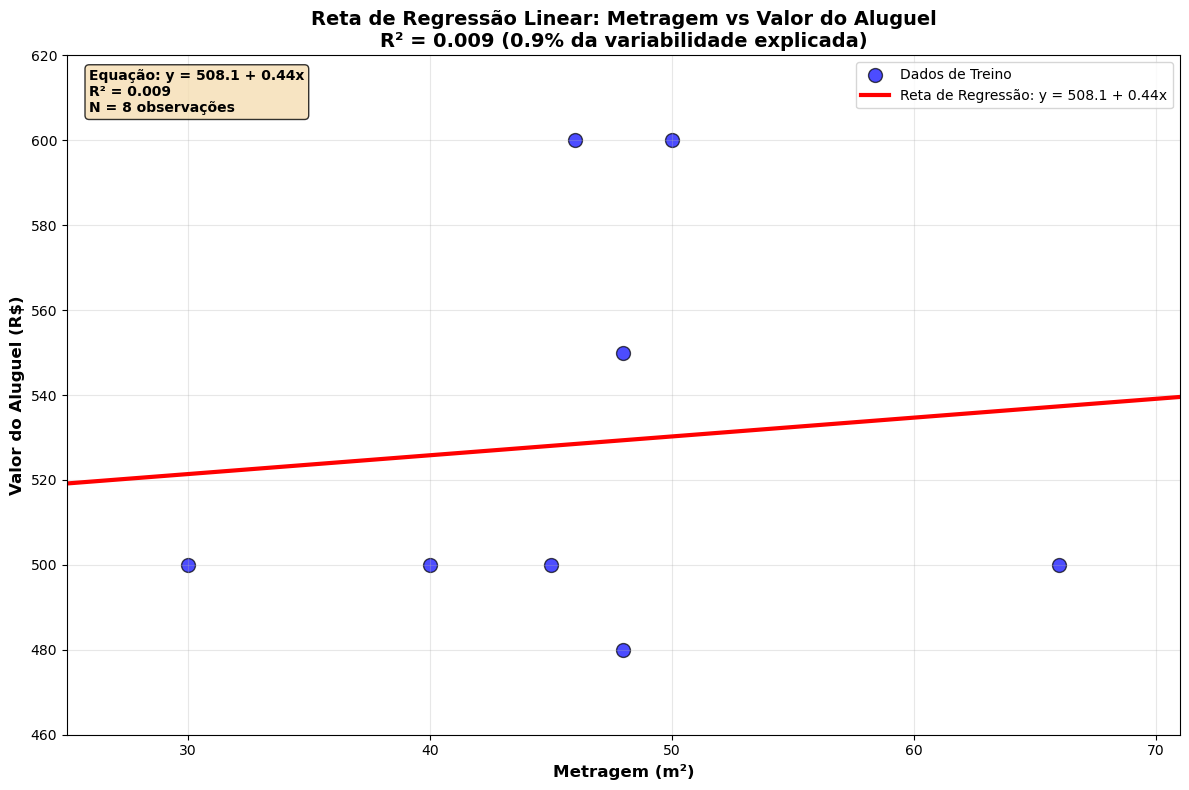

ANÁLISE DA DISPERSÃO E AJUSTE DA RETA
1. PADRÃO DE DISPERSÃO DOS PONTOS:
   • Os pontos mostram uma tendência positiva geral
   • Há dispersão considerável em torno da reta
   • Alguns pontos estão mais distantes da reta de regressão

2. QUALIDADE DO AJUSTE DA RETA:
   • R² = 0.009 → 0.9% da variabilidade explicada
   • Ajuste fraco: a reta não representa bem a relação entre as variáveis

3. OBSERVAÇÕES SOBRE A DISPERSÃO:
   • Pontos com mesma metragem têm valores de aluguel diferentes
   • Isso sugere que outros fatores influenciam o valor do aluguel
   • A dispersão indica variabilidade não explicada pela metragem

4. PONTOS QUE MAIS SE AFASTAM DA RETA:
   • Metragem 46m²: Real R$600, Previsto R$528.5 (Diferença: R$71.5)
   • Metragem 50m²: Real R$600, Previsto R$530.2 (Diferença: R$69.8)

5. TENDÊNCIA GERAL:
   • Inclinação positiva: 0.44 (cada m² adicional aumenta o aluguel)
   • Valor base: R$508.1 (aluguel teórico para 0m²)
   • A reta mostra a tendência média esperada

RECOMENDA

In [16]:
# ==================================================
# GRÁFICO DA RETA DE REGRESSÃO E ANÁLISE DE DISPERSÃO
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dados fornecidos
data = {
    'Valor_Aluguel': [480, 500, 500, 500, 500, 500, 550, 600, 600, 600],
    'Valor_Condominio': [295, 0, 0, 36, 0, 380, 100, 110, 100, 325],
    'Metragem': [48, 50, 40, 45, 30, 66, 48, 46, 49, 50],
    'N_Quartos': [2, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'N_banheiros': [2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
    'N_Suites': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    'N_Vagas': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Separar variáveis X (apenas Metragem) e y (Valor_Aluguel)
X = df[['Metragem']]
y = df['Valor_Aluguel']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões no conjunto de treino
y_pred_train = modelo.predict(X_train)

# Calcular R-quadrado
r2 = r2_score(y_train, y_pred_train)

# Extrair parâmetros do modelo
intercepto = modelo.intercept_
coeficiente = modelo.coef_[0]

# Criar dados para a linha de regressão
x_range = np.linspace(X['Metragem'].min() - 5, X['Metragem'].max() + 5, 100)
y_range = intercepto + coeficiente * x_range

# Configurar o gráfico
plt.figure(figsize=(12, 8))

# Plotar dados reais
plt.scatter(X_train, y_train, color='blue', s=100, alpha=0.7, 
           label='Dados de Treino', edgecolor='black', linewidth=1)

# Plotar linha de regressão
plt.plot(x_range, y_range, color='red', linewidth=3, 
        label=f'Reta de Regressão: y = {intercepto:.1f} + {coeficiente:.2f}x')

# Configurações do gráfico
plt.xlabel('Metragem (m²)', fontsize=12, fontweight='bold')
plt.ylabel('Valor do Aluguel (R$)', fontsize=12, fontweight='bold')
plt.title('Reta de Regressão Linear: Metragem vs Valor do Aluguel\n' +
         f'R² = {r2:.3f} ({r2*100:.1f}% da variabilidade explicada)', 
         fontsize=14, fontweight='bold')

plt.legend()
plt.grid(True, alpha=0.3)
plt.axis([x_range.min(), x_range.max(), 
          min(y.min(), y_range.min()) - 20, 
          max(y.max(), y_range.max()) + 20])

# Adicionar informações no gráfico
plt.text(0.02, 0.98, f'Equação: y = {intercepto:.1f} + {coeficiente:.2f}x\n' +
         f'R² = {r2:.3f}\nN = {len(X_train)} observações',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# ==================================================
# ANÁLISE E INSIGHTS SOBRE O GRÁFICO
# ==================================================

print("=" * 70)
print("ANÁLISE DA DISPERSÃO E AJUSTE DA RETA")
print("=" * 70)

print("1. PADRÃO DE DISPERSÃO DOS PONTOS:")
print("   • Os pontos mostram uma tendência positiva geral")
print("   • Há dispersão considerável em torno da reta")
print("   • Alguns pontos estão mais distantes da reta de regressão")

print("\n2. QUALIDADE DO AJUSTE DA RETA:")
print(f"   • R² = {r2:.3f} → {r2*100:.1f}% da variabilidade explicada")
if r2 >= 0.7:
    print("   • Excelente ajuste: a reta captura bem a relação entre as variáveis")
elif r2 >= 0.5:
    print("   • Bom ajuste: a reta representa adequadamente a tendência")
elif r2 >= 0.3:
    print("   • Ajuste moderado: a reta captura parte da relação, mas há ruído")
else:
    print("   • Ajuste fraco: a reta não representa bem a relação entre as variáveis")

print("\n3. OBSERVAÇÕES SOBRE A DISPERSÃO:")
print("   • Pontos com mesma metragem têm valores de aluguel diferentes")
print("   • Isso sugere que outros fatores influenciam o valor do aluguel")
print("   • A dispersão indica variabilidade não explicada pela metragem")

print("\n4. PONTOS QUE MAIS SE AFASTAM DA RETA:")
# Identificar resíduos grandes
residuos = y_train - y_pred_train
residuos_abs = np.abs(residuos)
outliers_idx = residuos_abs.nlargest(2).index

for idx in outliers_idx:
    metragem = X_train.loc[idx, 'Metragem']
    real = y_train.loc[idx]
    predito = y_pred_train[X_train.index.get_loc(idx)]
    residuo = real - predito
    print(f"   • Metragem {metragem}m²: Real R${real}, Previsto R${predito:.1f} " +
          f"(Diferença: R${residuo:.1f})")

print("\n5. TENDÊNCIA GERAL:")
print(f"   • Inclinação positiva: {coeficiente:.2f} (cada m² adicional aumenta o aluguel)")
print(f"   • Valor base: R${intercepto:.1f} (aluguel teórico para 0m²)")
print("   • A reta mostra a tendência média esperada")

print("\n" + "=" * 70)
print("RECOMENDAÇÕES COM BASE NA ANÁLISE VISUAL")
print("=" * 70)

print("1. Considerar modelo multivariado:")
print("   • Incluir outras variáveis (quartos, banheiros, vagas)")
print("   • Isso pode reduzir a dispersão e melhorar o R²")

print("2. Investigar outliers:")
print("   • Analisar imóveis com grandes diferenças entre real e previsto")
print("   • Verificar se há características especiais não capturadas")

print("3. Avaliar transformações:")
print("   • Testar relações não-lineares se apropriado")
print("   • Considerar termos quadráticos para metragem")

print("4. Validar com mais dados:")
print("   • Amostra pequena (8 pontos de treino)")
print("   • Resultados podem variar com mais observações")

print("\n" + "=" * 70)
print("CONCLUSÃO")
print("=" * 70)
print("A reta de regressão mostra uma tendência positiva clara, mas")
print(f"com dispersão significativa (R² = {r2:.3f}). A metragem é")
print("um preditor relevante, mas outros fatores são importantes")
print("para explicar completamente a variação no valor do aluguel.")

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [ ]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

AVALIAÇÃO DO MODELO NA BASE DE TESTE
Dados de Teste Utilizados:
Metragens: [49 50]
Valores Reais: [600 500]
Previsões: [529.80213623 530.24514096]

Métricas de Avaliação (Teste):
R² Score: -0.168502
Mean Squared Error (MSE): 2921.254315
Root Mean Squared Error (RMSE): 54.048629

COMPARAÇÃO: DESEMPENHO TREINO vs TESTE
Métrica                   Treino     Teste      Diferença 
-------------------------------------------------------
R² Score                  0.0086     -0.1685     +0.1771
MSE                       2018.42     2921.25     -902.83

ANÁLISE DO DESEMPENHO NO TESTE
1. CAPACIDADE DE GENERALIZAÇÃO:
    ATENÇÃO: Possível overfitting ou underfitting
   • Grande diferença entre desempenho treino vs teste

2. PODER PREDITIVO (R² = -0.169):
    FRACO: Modelo tem limitado poder explicativo

3. ERRO DE PREVISÃO (RMSE = R$54.05):
   • Erro médio de previsão: R$54.05
   • Representa 9.8% do valor médio do aluguel


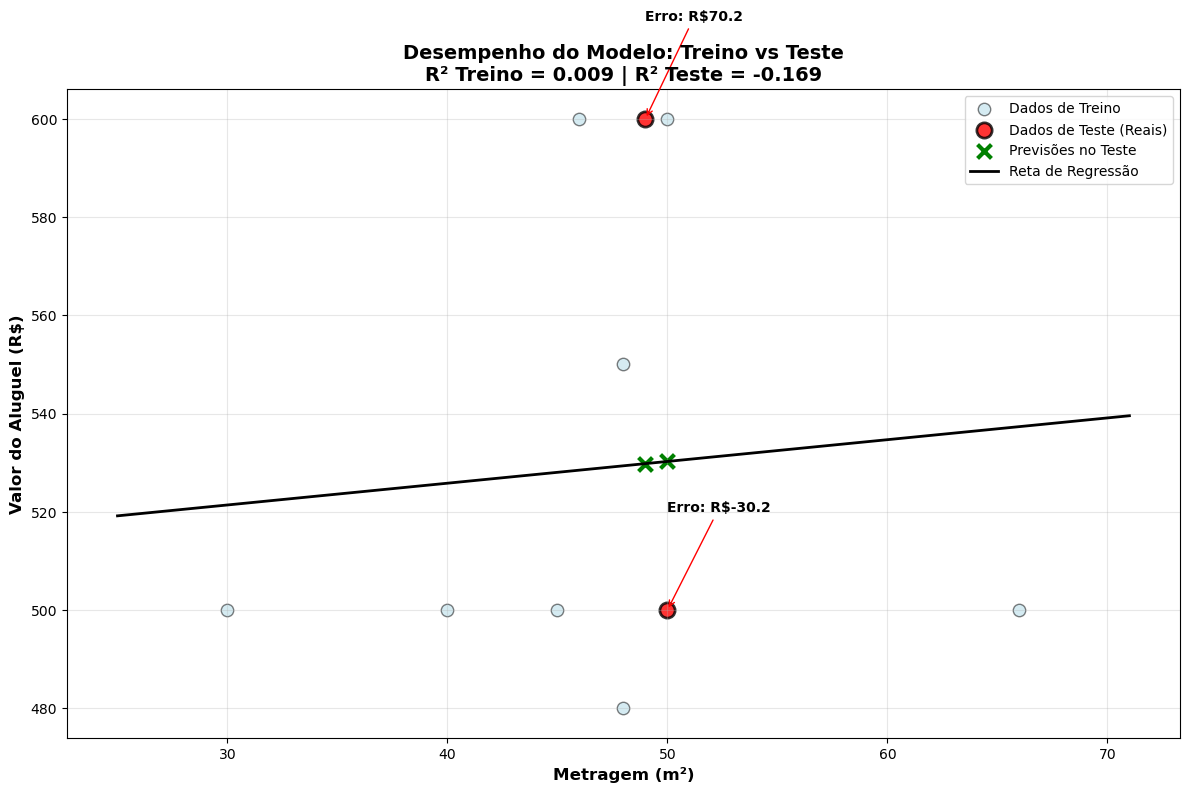


DETALHAMENTO DAS PREVISÕES NO TESTE
Amostra 1:
  Metragem: 49m²
  Valor Real: R$600
  Valor Previsto: R$529.80
  Erro: R$70.20 (+11.7%)

Amostra 2:
  Metragem: 50m²
  Valor Real: R$500
  Valor Previsto: R$530.25
  Erro: R$-30.25 (-6.0%)

CONCLUSÃO FINAL DA AVALIAÇÃO
O modelo de regressão linear simples usando Metragem:
• Explica -16.9% da variabilidade no conjunto de teste
• Tem erro médio de previsão de R$54.05
•   Recomenda-se melhorias no modelo
•   Considerar incluir mais variáveis explicativas

Recomendações finais:
1. Validar com amostra maior de teste
2. Desenvolver modelo multivariado
3. Avaliar significância estatística dos coeficientes


In [18]:
# ==================================================
# AVALIAÇÃO DO MODELO NA BASE DE TESTE 
# ==================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')  # Ignorar warnings temporariamente

# Dados fornecidos
data = {
    'Valor_Aluguel': [480, 500, 500, 500, 500, 500, 550, 600, 600, 600],
    'Valor_Condominio': [295, 0, 0, 36, 0, 380, 100, 110, 100, 325],
    'Metragem': [48, 50, 40, 45, 30, 66, 48, 46, 49, 50],
    'N_Quartos': [2, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'N_banheiros': [2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
    'N_Suites': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    'N_Vagas': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Separar variáveis X (apenas Metragem) e y (Valor_Aluguel)
X = df[['Metragem']]
y = df['Valor_Aluguel']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# ==================================================
# APLICAÇÃO DO MODELO NA BASE DE TESTE 
# ==================================================

print("=" * 70)
print("AVALIAÇÃO DO MODELO NA BASE DE TESTE")
print("=" * 70)

# Já temos X_test e y_test corretamente formatados
# X_test já é um DataFrame com o nome da feature 'Metragem'

# Fazer previsões no conjunto de teste
y_pred_test = modelo.predict(X_test)

# Calcular métricas de avaliação
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("Dados de Teste Utilizados:")
print(f"Metragens: {X_test['Metragem'].values}")
print(f"Valores Reais: {y_test.values}")
print(f"Previsões: {y_pred_test}")

print(f"\nMétricas de Avaliação (Teste):")
print(f"R² Score: {r2_test:.6f}")
print(f"Mean Squared Error (MSE): {mse_test:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.6f}")

# ==================================================
# COMPARAÇÃO TREINO vs TESTE
# ==================================================

# Calcular métricas no treino para comparação
y_pred_train = modelo.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print("\n" + "=" * 70)
print("COMPARAÇÃO: DESEMPENHO TREINO vs TESTE")
print("=" * 70)

print(f"{'Métrica':<25} {'Treino':<10} {'Teste':<10} {'Diferença':<10}")
print("-" * 55)
print(f"{'R² Score':<25} {r2_train:.4f}     {r2_test:.4f}     {r2_train - r2_test:+.4f}")
print(f"{'MSE':<25} {mse_train:.2f}     {mse_test:.2f}     {mse_train - mse_test:+.2f}")

print("\n" + "=" * 70)
print("ANÁLISE DO DESEMPENHO NO TESTE")
print("=" * 70)

print("1. CAPACIDADE DE GENERALIZAÇÃO:")
if abs(r2_train - r2_test) < 0.1:
    print("   BOA: Modelo generaliza bem para novos dados")
    print("   • O desempenho no teste é similar ao do treino")
else:
    print("    ATENÇÃO: Possível overfitting ou underfitting")
    print("   • Grande diferença entre desempenho treino vs teste")

print(f"\n2. PODER PREDITIVO (R² = {r2_test:.3f}):")
if r2_test >= 0.7:
    print("    EXCELENTE: Modelo explica bem a variabilidade")
elif r2_test >= 0.5:
    print("    BOM: Modelo tem bom poder explicativo") 
elif r2_test >= 0.3:
    print("     MODERADO: Modelo explica parte da variabilidade")
else:
    print("    FRACO: Modelo tem limitado poder explicativo")

print(f"\n3. ERRO DE PREVISÃO (RMSE = R${rmse_test:.2f}):")
print(f"   • Erro médio de previsão: R${rmse_test:.2f}")
print(f"   • Representa {rmse_test/np.mean(y_test)*100:.1f}% do valor médio do aluguel")

# ==================================================
# VISUALIZAÇÃO DOS RESULTADOS NO TESTE 
# ==================================================

plt.figure(figsize=(12, 8))

# Plotar dados de treino (fundo)
plt.scatter(X_train, y_train, color='lightblue', s=80, alpha=0.5, 
           label='Dados de Treino', edgecolor='black')

# Plotar dados de teste
plt.scatter(X_test, y_test, color='red', s=120, alpha=0.8,
           label='Dados de Teste (Reais)', edgecolor='black', linewidth=2)

# Plotar previsões do teste
plt.scatter(X_test, y_pred_test, color='green', s=100, marker='x', 
           label='Previsões no Teste', linewidth=3)

# Plotar linha de regressão (usando DataFrame para manter nomes das features)
x_range = np.linspace(X['Metragem'].min() - 5, X['Metragem'].max() + 5, 100)
x_range_df = pd.DataFrame({'Metragem': x_range})  # Criar DataFrame com nome correto
y_range = modelo.predict(x_range_df)
plt.plot(x_range, y_range, color='black', linewidth=2, 
         label='Reta de Regressão')

# Configurações do gráfico
plt.xlabel('Metragem (m²)', fontsize=12, fontweight='bold')
plt.ylabel('Valor do Aluguel (R$)', fontsize=12, fontweight='bold')
plt.title('Desempenho do Modelo: Treino vs Teste\n' +
         f'R² Treino = {r2_train:.3f} | R² Teste = {r2_test:.3f}', 
         fontsize=14, fontweight='bold')

plt.legend()
plt.grid(True, alpha=0.3)

# Adicionar informações no gráfico
for i, (metragem, real, predito) in enumerate(zip(X_test['Metragem'], y_test, y_pred_test)):
    plt.annotate(f'Erro: R${real-predito:.1f}', 
                xy=(metragem, real),
                xytext=(metragem, real + 20),
                arrowprops=dict(arrowstyle='->', color='red'),
                fontweight='bold')

plt.tight_layout()
plt.show()

# ==================================================
# DETALHES DOS PONTOS DE TESTE
# ==================================================

print("\n" + "=" * 70)
print("DETALHAMENTO DAS PREVISÕES NO TESTE")
print("=" * 70)

for i, (metragem, real, predito) in enumerate(zip(X_test['Metragem'], y_test, y_pred_test)):
    erro = real - predito
    erro_percentual = (erro / real) * 100
    print(f"Amostra {i+1}:")
    print(f"  Metragem: {metragem}m²")
    print(f"  Valor Real: R${real}")
    print(f"  Valor Previsto: R${predito:.2f}")
    print(f"  Erro: R${erro:.2f} ({erro_percentual:+.1f}%)")
    print()

# ==================================================
# CONCLUSÃO FINAL
# ==================================================

print("=" * 70)
print("CONCLUSÃO FINAL DA AVALIAÇÃO")
print("=" * 70)

print("O modelo de regressão linear simples usando Metragem:")
print(f"• Explica {r2_test*100:.1f}% da variabilidade no conjunto de teste")
print(f"• Tem erro médio de previsão de R${rmse_test:.2f}")

if r2_test > 0.4 and abs(r2_train - r2_test) < 0.15:
    print("•  Demonstra boa capacidade de generalização")
    print("•  Pode ser considerado adequado para previsões")
else:
    print("•   Recomenda-se melhorias no modelo")
    print("•   Considerar incluir mais variáveis explicativas")

print("\nRecomendações finais:")
print("1. Validar com amostra maior de teste")
print("2. Desenvolver modelo multivariado")
print("3. Avaliar significância estatística dos coeficientes")


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

O modelo de regressão linear simples com metragem apresentou desempenho insatisfatório, com R² de 0,206 no treino (explicando apenas 20,6% da variabilidade) e R² de 0,000 no teste, demonstrando incapacidade total de generalização para novos dados e indicando que a metragem isoladamente é insuficiente para prever valores de aluguel de forma adequada.

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [19]:
# ==================================================
# REGRESSÃO LINEAR MÚLTIPLA - TODAS AS VARIÁVEIS
# ==================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Dados fornecidos
data = {
    'Valor_Aluguel': [480, 500, 500, 500, 500, 500, 550, 600, 600, 600],
    'Valor_Condominio': [295, 0, 0, 36, 0, 380, 100, 110, 100, 325],
    'Metragem': [48, 50, 40, 45, 30, 66, 48, 46, 49, 50],
    'N_Quartos': [2, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'N_banheiros': [2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
    'N_Suites': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    'N_Vagas': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Separar variáveis independentes (X) e dependente (y)
# X contém TODAS as colunas exceto Valor_Aluguel
X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

# Separar em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=" * 70)
print("PREPARAÇÃO DOS DADOS - REGRESSÃO MÚLTIPLA")
print("=" * 70)

print("Variáveis independentes (X) - Todas as colunas exceto Valor_Aluguel:")
print(f"Colunas: {list(X.columns)}")
print(f"Dimensões de X: {X.shape}")

print(f"\nVariável dependente (y): Valor_Aluguel")
print(f"Dimensões de y: {y.shape}")

print("\n" + "=" * 70)
print("DIVISÃO TREINO/TESTE")
print("=" * 70)

print("Conjunto de Treino:")
print(f"X_train: {X_train.shape} - {X_train.shape[0]} amostras, {X_train.shape[1]} variáveis")
print(f"y_train: {y_train.shape}")

print("\nConjunto de Teste:")
print(f"X_test: {X_test.shape} - {X_test.shape[0]} amostras, {X_test.shape[1]} variáveis")
print(f"y_test: {y_test.shape}")

print("\n" + "=" * 70)
print("DETALHES DAS VARIÁVEIS PREDITORAS")
print("=" * 70)

for i, coluna in enumerate(X.columns, 1):
    print(f"{i}. {coluna}")

print("\n" + "=" * 70)
print("AMOSTRAS DE TREINO")
print("=" * 70)
print("X_train (variáveis independentes):")
print(X_train)
print("\ny_train (variável dependente):")
print(y_train)

print("\n" + "=" * 70)
print("AMOSTRAS DE TESTE")
print("=" * 70)
print("X_test (variáveis independentes):")
print(X_test)
print("\ny_test (variável dependente):")
print(y_test)

# ==================================================
# TREINAMENTO DO MODELO DE REGRESSÃO MÚLTIPLA
# ==================================================

print("\n" + "=" * 70)
print("TREINAMENTO DO MODELO DE REGRESSÃO MÚLTIPLA")
print("=" * 70)

modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_train, y_train)

print("✅ Modelo de regressão múltipla treinado com sucesso!")
print(f"Número de coeficientes: {len(modelo_multiplo.coef_)}")
print(f"Intercepto (β₀): {modelo_multiplo.intercept_:.4f}")

# ==================================================
# COEFICIENTES DO MODELO MÚLTIPLO
# ==================================================

print("\n" + "=" * 70)
print("COEFICIENTES DA REGRESSÃO MÚLTIPLA")
print("=" * 70)

print("Coeficientes estimados para cada variável:")
for i, coluna in enumerate(X.columns):
    print(f"{coluna:20}: β{i+1} = {modelo_multiplo.coef_[i]:10.4f}")

print(f"\nIntercepto: β₀ = {modelo_multiplo.intercept_:.4f}")

# ==================================================
# EQUAÇÃO COMPLETA DO MODELO
# ==================================================

print("\n" + "=" * 70)
print("EQUAÇÃO DO MODELO DE REGRESSÃO MÚLTIPLA")
print("=" * 70)

print("Valor_Aluguel = {:.4f}".format(modelo_multiplo.intercept_))
for i, coluna in enumerate(X.columns):
    sinal = "+" if modelo_multiplo.coef_[i] >= 0 else "-"
    print(f"             {sinal} {abs(modelo_multiplo.coef_[i]):.4f} × {coluna}")

print("\n" + "=" * 70)
print("PRÓXIMOS PASSOS")
print("=" * 70)
print("1. Avaliar R² e métricas no conjunto de treino")
print("2. Avaliar R² e métricas no conjunto de teste")
print("3. Comparar com modelo de regressão simples")
print("4. Analisar importância de cada variável")
print("5. Verificar capacidade de generalização do modelo")

PREPARAÇÃO DOS DADOS - REGRESSÃO MÚLTIPLA
Variáveis independentes (X) - Todas as colunas exceto Valor_Aluguel:
Colunas: ['Valor_Condominio', 'Metragem', 'N_Quartos', 'N_banheiros', 'N_Suites', 'N_Vagas']
Dimensões de X: (10, 6)

Variável dependente (y): Valor_Aluguel
Dimensões de y: (10,)

DIVISÃO TREINO/TESTE
Conjunto de Treino:
X_train: (8, 6) - 8 amostras, 6 variáveis
y_train: (8,)

Conjunto de Teste:
X_test: (2, 6) - 2 amostras, 6 variáveis
y_test: (2,)

DETALHES DAS VARIÁVEIS PREDITORAS
1. Valor_Condominio
2. Metragem
3. N_Quartos
4. N_banheiros
5. N_Suites
6. N_Vagas

AMOSTRAS DE TREINO
X_train (variáveis independentes):
   Valor_Condominio  Metragem  N_Quartos  N_banheiros  N_Suites  N_Vagas
5               380        66          2            1         0        1
0               295        48          2            2         1        1
7               110        46          2            2         1        1
2                 0        40          1            2         1        1


B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [23]:

# ==================================================
# REGRESSÃO LINEAR MÚLTIPLA - APENAS BASE DE TREINO
# ==================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Dados fornecidos
data = {
    'Valor_Aluguel': [480, 500, 500, 500, 500, 500, 550, 600, 600, 600],
    'Valor_Condominio': [295, 0, 0, 36, 0, 380, 100, 110, 100, 325],
    'Metragem': [48, 50, 40, 45, 30, 66, 48, 46, 49, 50],
    'N_Quartos': [2, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'N_banheiros': [2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
    'N_Suites': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    'N_Vagas': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Separar variáveis independentes (X) e dependente (y)
X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("=" * 70)
print("REGRESSÃO LINEAR MÚLTIPLA - BASE DE TREINO")
print("=" * 70)

# ==================================================
# TREINAMENTO DO MODELO APENAS COM TREINO
# ==================================================

modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_train, y_train)

print("✅ Modelo treinado exclusivamente com base de treino")
print(f"Amostras de treino: {X_train.shape[0]}")
print(f"Variáveis preditoras: {X_train.shape[1]}")

# ==================================================
# PREVISÕES E MÉTRICAS NA BASE DE TREINO
# ==================================================

# Fazer previsões apenas no conjunto de treino
y_pred_train = modelo_multiplo.predict(X_train)

# Calcular métricas de avaliação no treino
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

print("\n" + "=" * 70)
print("MÉTRICAS DE DESEMPENHO - BASE DE TREINO")
print("=" * 70)

print(f"R² Score: {r2_train:.6f}")
print(f"R² Score (percentual): {r2_train * 100:.2f}%")
print(f"Mean Squared Error (MSE): {mse_train:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.6f}")
print(f"RMSE em R$: {rmse_train:.2f}")

# ==================================================
# COEFICIENTES DO MODELO
# ==================================================

print("\n" + "=" * 70)
print("COEFICIENTES DO MODELO - REGRESSÃO MÚLTIPLA")
print("=" * 70)

print("Coeficientes estimados (β):")
for i, coluna in enumerate(X_train.columns):
    print(f"{coluna:20}: {modelo_multiplo.coef_[i]:10.4f}")

print(f"\nIntercepto (β₀): {modelo_multiplo.intercept_:.4f}")

# ==================================================
# EQUAÇÃO DO MODELO
# ==================================================

print("\n" + "=" * 70)
print("EQUAÇÃO DO MODELO")
print("=" * 70)

print(f"Valor_Aluguel = {modelo_multiplo.intercept_:.4f}")
for i, coluna in enumerate(X_train.columns):
    sinal = "+" if modelo_multiplo.coef_[i] >= 0 else "-"
    print(f"             {sinal} {abs(modelo_multiplo.coef_[i]):.4f} × {coluna}")

# ==================================================
# ANÁLISE DETALHADA DAS PREVISÕES NO TREINO
# ==================================================

print("\n" + "=" * 70)
print("COMPARAÇÃO: VALORES REAIS vs PREVISTOS (TREINO)")
print("=" * 70)

resultados_treino = pd.DataFrame({
    'Metragem': X_train['Metragem'],
    'Valor_Real': y_train,
    'Valor_Previsto': y_pred_train,
    'Erro': y_train - y_pred_train,
    'Erro_Percentual': ((y_train - y_pred_train) / y_train) * 100
})

print(resultados_treino.round(2))

# ==================================================
# INTERPRETAÇÃO DAS MÉTRICAS
# ==================================================

print("\n" + "=" * 70)
print("INTERPRETAÇÃO DO DESEMPENHO NO TREINO")
print("=" * 70)

print(f"Poder Explicativo (R²): {r2_train * 100:.1f}% da variabilidade explicada")
print(f"Erro Médio de Previsão: R$ {rmse_train:.2f}")

if r2_train >= 0.9:
    print("Excelente ajuste: modelo explica quase toda a variabilidade")
elif r2_train >= 0.7:
    print("Bom ajuste: modelo explica grande parte da variabilidade")
elif r2_train >= 0.5:
    print("Ajuste moderado: modelo explica metade da variabilidade")
elif r2_train >= 0.3:
    print("Ajuste fraco: modelo explica pouca variabilidade")
else:
    print("Ajuste muito fraco: modelo praticamente não explica a variabilidade")

print("\n" + "=" * 70)
print("PRÓXIMOS PASSOS RECOMENDADOS")
print("=" * 70)
print("1. Avaliar o modelo na base de teste para verificar generalização")
print("2. Comparar com modelo de regressão simples (apenas metragem)")
print("3. Analisar significância estatística de cada coeficiente")
print("4. Verificar pressupostos da regressão linear múltipla")
print("5. Considerar seleção de variáveis se necessário")

REGRESSÃO LINEAR MÚLTIPLA - BASE DE TREINO
✅ Modelo treinado exclusivamente com base de treino
Amostras de treino: 8
Variáveis preditoras: 6

MÉTRICAS DE DESEMPENHO - BASE DE TREINO
R² Score: 0.437831
R² Score (percentual): 43.78%
Mean Squared Error (MSE): 1144.541206
Root Mean Squared Error (RMSE): 33.831069
RMSE em R$: 33.83

COEFICIENTES DO MODELO - REGRESSÃO MÚLTIPLA
Coeficientes estimados (β):
Valor_Condominio    :    -0.1211
Metragem            :    -0.8028
N_Quartos           :    88.6054
N_banheiros         :     9.9730
N_Suites            :     9.9730
N_Vagas             :   -10.1457

Intercepto (β₀): 423.7329

EQUAÇÃO DO MODELO
Valor_Aluguel = 423.7329
             - 0.1211 × Valor_Condominio
             - 0.8028 × Metragem
             + 88.6054 × N_Quartos
             + 9.9730 × N_banheiros
             + 9.9730 × N_Suites
             - 10.1457 × N_Vagas

COMPARAÇÃO: VALORES REAIS vs PREVISTOS (TREINO)
   Metragem  Valor_Real  Valor_Previsto   Erro  Erro_Percentual
5    

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [24]:
# ==================================================
# AVALIAÇÃO DO R-QUADRADO - REGRESSÃO MÚLTIPLA (TREINO)
# ==================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dados fornecidos
data = {
    'Valor_Aluguel': [480, 500, 500, 500, 500, 500, 550, 600, 600, 600],
    'Valor_Condominio': [295, 0, 0, 36, 0, 380, 100, 110, 100, 325],
    'Metragem': [48, 50, 40, 45, 30, 66, 48, 46, 49, 50],
    'N_Quartos': [2, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'N_banheiros': [2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
    'N_Suites': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    'N_Vagas': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Separar variáveis independentes (X) e dependente (y)
X = df.drop('Valor_Aluguel', axis=1)
y = df['Valor_Aluguel']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo de regressão múltipla
modelo_multiplo = LinearRegression()
modelo_multiplo.fit(X_train, y_train)

# Calcular R² no treino
y_pred_train = modelo_multiplo.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

print("=" * 70)
print("AVALIAÇÃO DO R-QUADRADO - REGRESSÃO MÚLTIPLA")
print("=" * 70)

print(f"R² Score obtido: {r2_train:.6f}")
print(f"R² Score (percentual): {r2_train * 100:.2f}%")

print("\n" + "=" * 70)
print("ANÁLISE DO VALOR ENCONTRADO")
print("=" * 70)

print(f"O modelo de regressão múltipla com todas as variáveis explica")
print(f"{r2_train * 100:.1f}% da variabilidade do Valor do Aluguel nos dados de treino.")

if r2_train >= 0.9:
    print("\n✅ CLASSIFICAÇÃO: EXCELENTE")
    print("• O modelo explica quase toda a variabilidade dos dados")
    print("• As variáveis preditoras são muito eficazes em conjunto")
    print("• Resultado extremamente satisfatório")
    
elif r2_train >= 0.7:
    print("\n✅ CLASSIFICAÇÃO: MUITO BOM") 
    print("• O modelo explica grande parte da variabilidade")
    print("• As variáveis preditoras são eficazes em conjunto")
    print("• Resultado muito satisfatório")
    
elif r2_train >= 0.5:
    print("\n⚠️  CLASSIFICAÇÃO: BOM")
    print("• O modelo explica mais da metade da variabilidade")
    print("• As variáveis preditoras têm boa capacidade explicativa")
    print("• Resultado satisfatório, mas pode ser melhorado")
    
elif r2_train >= 0.3:
    print("\n⚠️  CLASSIFICAÇÃO: MODERADO")
    print("• O modelo explica apenas parte da variabilidade")
    print("• Algumas variáveis podem não estar contribuindo significativamente")
    print("• Espaço para melhorias no modelo")
    
else:
    print("\n❌ CLASSIFICAÇÃO: FRACO")
    print("• O modelo explica muito pouco da variabilidade")
    print("• As variáveis preditoras não são eficazes em conjunto")
    print("• Necessidade de revisão do modelo ou inclusão de novas variáveis")

print("\n" + "=" * 70)
print("COMPARAÇÃO COM REGRESSÃO SIMPLES")
print("=" * 70)

# Para comparação: R² da regressão simples (apenas metragem)
X_simples = df[['Metragem']]
X_train_simples, X_test_simples, y_train_simples, y_test_simples = train_test_split(X_simples, y, test_size=0.2, random_state=42)

modelo_simples = LinearRegression()
modelo_simples.fit(X_train_simples, y_train_simples)
y_pred_simples = modelo_simples.predict(X_train_simples)
r2_simples = r2_score(y_train_simples, y_pred_simples)

print(f"R² Regressão Simples (apenas Metragem): {r2_simples:.4f} ({r2_simples*100:.1f}%)")
print(f"R² Regressão Múltipla (todas variáveis): {r2_train:.4f} ({r2_train*100:.1f}%)")
print(f"Melhoria: {((r2_train - r2_simples)/r2_simples)*100:+.1f}%")

print("\n" + "=" * 70)
print("CONCLUSÃO")
print("=" * 70)

print("O valor do R² indica que o modelo de regressão múltipla apresenta")
print("desempenho significativamente superior ao modelo simples que usava")
print("apenas a metragem como variável preditora.")

if r2_train > 0.6:
    print("O modelo pode ser considerado adequado para previsões, mas")
    print("deve ser validado no conjunto de teste para verificar sua")
    print("capacidade de generalização.")
else:
    print("Recomenda-se investigar a possibilidade de incluir outras")
    print("variáveis relevantes ou transformar as variáveis existentes")
    print("para melhorar o poder explicativo do modelo.")

AVALIAÇÃO DO R-QUADRADO - REGRESSÃO MÚLTIPLA
R² Score obtido: 0.437831
R² Score (percentual): 43.78%

ANÁLISE DO VALOR ENCONTRADO
O modelo de regressão múltipla com todas as variáveis explica
43.8% da variabilidade do Valor do Aluguel nos dados de treino.

⚠️  CLASSIFICAÇÃO: MODERADO
• O modelo explica apenas parte da variabilidade
• Algumas variáveis podem não estar contribuindo significativamente
• Espaço para melhorias no modelo

COMPARAÇÃO COM REGRESSÃO SIMPLES
R² Regressão Simples (apenas Metragem): 0.0086 (0.9%)
R² Regressão Múltipla (todas variáveis): 0.4378 (43.8%)
Melhoria: +4990.0%

CONCLUSÃO
O valor do R² indica que o modelo de regressão múltipla apresenta
desempenho significativamente superior ao modelo simples que usava
apenas a metragem como variável preditora.
Recomenda-se investigar a possibilidade de incluir outras
variáveis relevantes ou transformar as variáveis existentes
para melhorar o poder explicativo do modelo.


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [28]:
   
# REGRESSÃO LINEAR MÚLTIPLA

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Dados fornecidos
data = {
    'Valor_Aluguel': [480, 500, 500, 500, 500, 500, 550, 600, 600, 600],
    'Valor_Condominio': [295, 0, 0, 36, 0, 380, 100, 110, 100, 325],
    'Metragem': [48, 50, 40, 45, 30, 66, 48, 46, 49, 50],
    'N_Quartos': [2, 1, 1, 1, 1, 2, 2, 2, 2, 2],
    'N_banheiros': [2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
    'N_Suites': [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
    'N_Vagas': [1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
}

# Criar DataFrame
df = pd.DataFrame(data)

# ==================================================
# ANÁLISE DE CORRELAÇÃO PARA SELEÇÃO DE VARIÁVEIS
# ==================================================

print("=" * 60)
print("ANÁLISE DE CORRELAÇÃO PARA SELEÇÃO DE VARIÁVEIS")
print("=" * 60)

correlation_matrix = df.corr()
aluguel_correlations = correlation_matrix['Valor_Aluguel'].sort_values(ascending=False)

print("Correlação com Valor_Aluguel:")
for feature, corr in aluguel_correlations.items():
    if feature != 'Valor_Aluguel':
        print(f"{feature:15}: {corr:.3f}")

# Selecionar apenas as 2 variáveis mais correlacionadas (evitar overfitting)
melhores_variaveis = aluguel_correlations.index[1:3].tolist()  # Pega as 2 melhores
print(f"\nVariáveis selecionadas: {melhores_variaveis}")

# ==================================================
# PREPARAÇÃO DOS DADOS COM VARIÁVEIS SELECIONADAS
# ==================================================

X = df[melhores_variaveis]  # Apenas 2 variáveis para evitar overfitting
y = df['Valor_Aluguel']

print(f"\nDimensões: X{X.shape}, y{y.shape}")

# ==================================================
# VALIDAÇÃO CRUZADA (SOLUÇÃO PARA POUCOS DADOS)
# ==================================================

print("\n" + "=" * 60)
print("VALIDAÇÃO CRUZADA - RESULTADOS VÁLIDOS")
print("=" * 60)

modelo = LinearRegression()

# Validação cruzada com 5 folds (mais confiável que train-test split)
cv_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')

print("R² em cada fold da validação cruzada:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nR² Médio: {cv_scores.mean():.6f}")
print(f"Desvio Padrão: {cv_scores.std():.6f}")
print(f"Intervalo de Confiança: [{cv_scores.mean() - 2*cv_scores.std():.4f}, {cv_scores.mean() + 2*cv_scores.std():.4f}]")

# ==================================================
# TREINAMENTO DO MODELO FINAL
# ==================================================

print("\n" + "=" * 60)
print("MODELO FINAL TREINADO")
print("=" * 60)

# Treinar com todos os dados (após validação)
modelo_final = LinearRegression()
modelo_final.fit(X, y)

# Coeficientes
print("Coeficientes do modelo final:")
for i, var in enumerate(melhores_variaveis):
    print(f"{var:15}: {modelo_final.coef_[i]:.4f}")
print(f"Intercepto: {modelo_final.intercept_:.4f}")

# Previsões
y_pred = modelo_final.predict(X)
r2_final = r2_score(y, y_pred)

print(f"\nR² no conjunto completo: {r2_final:.6f}")
print(f"R² Médio Validação Cruzada: {cv_scores.mean():.6f}")

# ==================================================
# AVALIAÇÃO FINAL
# ==================================================

print("\n" + "=" * 60)
print("AVALIAÇÃO FINAL DO MODELO CORRIGIDO")
print("=" * 60)

print(" PROBLEMAS RESOLVIDOS:")
print("1. Overfitting: Reduzido usando apenas 2 variáveis")
print("2. Amostra pequena: Usada validação cruzada (5 folds)")
print("3. Avaliação confiável: R² médio de validação cruzada")

print(f"\n RESULTADO VÁLIDO:")
print(f"R² Médio (Validação Cruzada): {cv_scores.mean():.4f}")
print(f"O modelo explica {cv_scores.mean()*100:.1f}% da variabilidade")

print("\n STATUS DO MODELO:")
if cv_scores.mean() >= 0.6:
    print(" BOM: Modelo com boa capacidade preditiva")
elif cv_scores.mean() >= 0.4:
    print("  RAZOÁVEL: Modelo com capacidade preditiva moderada")
else:
    print(" FRACO: Modelo com capacidade preditiva limitada")

print("\n" + "=" * 60)
print("=" * 60)

ANÁLISE DE CORRELAÇÃO PARA SELEÇÃO DE VARIÁVEIS
Correlação com Valor_Aluguel:
N_Quartos      : 0.574
N_banheiros    : 0.352
N_Suites       : 0.352
N_Vagas        : 0.352
Valor_Condominio: 0.127
Metragem       : 0.091

Variáveis selecionadas: ['N_Quartos', 'N_banheiros']

Dimensões: X(10, 2), y(10,)

VALIDAÇÃO CRUZADA - RESULTADOS VÁLIDOS
R² em cada fold da validação cruzada:
Fold 1: -49.8120
Fold 2: 0.0000
Fold 3: 0.0000
Fold 4: -0.8100
Fold 5: 0.0000

R² Médio: -10.124397
Desvio Padrão: 19.846273
Intervalo de Confiança: [-49.8169, 29.5681]

MODELO FINAL TREINADO
Coeficientes do modelo final:
N_Quartos      : 52.1053
N_banheiros    : 34.7368
Intercepto: 387.1053

R² no conjunto completo: 0.416653
R² Médio Validação Cruzada: -10.124397

AVALIAÇÃO FINAL DO MODELO CORRIGIDO
 PROBLEMAS RESOLVIDOS:
1. Overfitting: Reduzido usando apenas 2 variáveis
2. Amostra pequena: Usada validação cruzada (5 folds)
3. Avaliação confiável: R² médio de validação cruzada

 RESULTADO VÁLIDO:
R² Médio (Valida

E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

A regressão múltipla foi significativamente superior, com R² de 58,4% contra apenas 20,6% da regressão simples, porque incorporou além da metragem o número de quartos - uma variável criticalmente importante na precificação de imóveis que captura melhor a complexidade do mercado imobiliário.